Pipeline for Extracting Keywords from the dataset

In [2]:
import pandas as pd
import spacy
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import pickle 
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt 

In [3]:
nlp = spacy.load("en_core_web_sm")

path = "./6622_jobs.xls"
df_import = pd.read_excel(path)

df_import.shape

(6623, 11)

In [118]:
types = df_import.dtypes
print(types)

Unnamed: 0                int64
title                    object
details                  object
deadline         datetime64[ns]
opport_type              object
commence_date            object
contract_type            object
location                 object
Renumeration             object
company                  object
links                    object
dtype: object


DATA WRANGLING

In [4]:
df_import.head(2)

,Unnamed: 0,title,details,deadline,opport_type,commence_date,contract_type,location,Renumeration,company,links
0,0,Rothschild & Co - Private Equity Long-Term Int...,This London-based 6-month internship is an exc...,2023-04-30,Internship,2023-07-01 00:00:00,Temporary,London,NaN,Rothschild & Co,https://careers.lse.ac.uk//students/jobs/detai...
1,1,2023 HSBC Global Graduate Programme (Hong Kong...,You’re excited about starting your career and ...,2023-01-06,Graduate employment,2023-07-03 00:00:00,Temporary,Hong KongSingapore,NaN,HSBC (HSBC) - Hong Kong,https://careers.lse.ac.uk//students/jobs/detai...


In [5]:
df1 = df_import.iloc[:, 1:5]

df2 = df_import.iloc[:, [7,9,10]]

pdList = [df1,df2]
df = pd.concat(pdList,axis=1)
df.head()

,title,details,deadline,opport_type,location,company,links
0,Rothschild & Co - Private Equity Long-Term Int...,This London-based 6-month internship is an exc...,2023-04-30,Internship,London,Rothschild & Co,https://careers.lse.ac.uk//students/jobs/detai...
1,2023 HSBC Global Graduate Programme (Hong Kong...,You’re excited about starting your career and ...,2023-01-06,Graduate employment,Hong KongSingapore,HSBC (HSBC) - Hong Kong,https://careers.lse.ac.uk//students/jobs/detai...
2,2023 HSBC Global Internship Programme (Hong Ko...,You’re excited about starting your career and ...,2023-01-06,Internship,Hong KongSingapore,HSBC (HSBC) - Hong Kong,https://careers.lse.ac.uk//students/jobs/detai...
3,"Graduate Training Scheme, Capital Markets",Graduate Training Scheme – LondonGreySpark Par...,2022-12-17,Graduate employment,London,GreySpark Partners Ltd,https://careers.lse.ac.uk//students/jobs/detai...
4,6-Months Internship – Sell-side Tech M&A,"At IPTP, we understand software from decades o...",2022-12-31,Internship,France,Inflexion Points Technology Partners (IPTP),https://careers.lse.ac.uk//students/jobs/detai...


In [6]:
df.shape

types = df.dtypes
print(types)

df_title = df.iloc[:,0]
df_text = df.iloc[:, [1]]

df_dline = df.iloc[:, [2]]


title                  object
details                object
deadline       datetime64[ns]
opport_type            object
location               object
company                object
links                  object
dtype: object


In [7]:
df_text.head()

,details
0,This London-based 6-month internship is an exc...
1,You’re excited about starting your career and ...
2,You’re excited about starting your career and ...
3,Graduate Training Scheme – LondonGreySpark Par...
4,"At IPTP, we understand software from decades o..."


In [8]:
df_dline.head()

,deadline
0,2023-04-30
1,2023-01-06
2,2023-01-06
3,2022-12-17
4,2022-12-31


In [9]:
type(df_text)

pandas.core.frame.DataFrame

In [10]:
len(df_text)

6623

PIPELINE PART 1: NLP() 

In [11]:
len(df_text)

6623

In [12]:
# convering the column of texts into a list of text
lst_lst = df_text.values.tolist()

# storing the data type of every element in the list of texts (which contains all of the job details)
# we expect the text data to be a 'str' object
# non_str_index tells us which indexes include non-string values and therefore should be removed
non_str_index = [i for i, sublst in enumerate(lst_lst) if any(not isinstance(val, str) for val in sublst)]
non_str_index

df_text_filtered = df_text.drop(non_str_index, axis=0, inplace=False) 
len(df_text_filtered)

6620

In [13]:
df_text_filtered_1 = df_text_filtered[0:1000]
df_text_filtered_2 = df_text_filtered[1000:2000]
df_text_filtered_3 = df_text_filtered[2000:3000]
df_text_filtered_4 = df_text_filtered[3000:4000]
df_text_filtered_5 = df_text_filtered[4000:5000]
df_text_filtered_6 = df_text_filtered[5000:6000]
df_text_filtered_7 = df_text_filtered[6000:]

In [14]:
docs_1 = df_text_filtered_1['details'].apply(nlp)

In [15]:
len(docs_1)

pandas.core.series.Series

In [16]:
docs_2 = df_text_filtered_2['details'].apply(nlp)
len(docs_2)

1000

In [17]:
docs_3 = df_text_filtered_3['details'].apply(nlp)
len(docs_3)

1000

In [18]:
docs_4 = df_text_filtered_4['details'].apply(nlp)
len(docs_4)

1000

In [19]:
docs_5 = df_text_filtered_5['details'].apply(nlp)
len(docs_5)

1000

In [20]:
docs_6 = df_text_filtered_6['details'].apply(nlp)
len(docs_6)

1000

In [21]:
docs_7 = df_text_filtered_7['details'].apply(nlp)
len(docs_7)

620

In [22]:
docs_all = pd.concat([docs_1,docs_2,docs_3,docs_4,docs_5,docs_6,docs_7], axis = 1)

docs_all.shape

(6620,)

In [23]:
len(docs_all)

6620

In [24]:
docs_all.head()

0    (This, London, -, based, 6, -, month, internsh...
1    (You, ’re, excited, about, starting, your, car...
2    (You, ’re, excited, about, starting, your, car...
3    (Graduate, Training, Scheme, –, LondonGreySpar...
4    (At, IPTP, ,, we, understand, software, from, ...
Name: details, dtype: object

In [117]:
# Optional!

# use this to store the list of documents locally (running nlp() again takes time)

with open("all_nlp_docs.pickle", "wb") as f:
    pickle.dump(docs_all, f)

# requires GitHub LFS as the resulting pickle object is larger than 100MB

In [26]:
# use this code to open the 
#with open("all_spacy_docs.pickle", "rb") as f:
#    loaded_all_docs = pickle.load(f)

PIPELINE PART 2: Parts-of-Speech Filter 

In [27]:
# Keeping only Propernouns and Nouns

filtered_docs_all = list([[token.text for token in doc if token.pos_ in ['PROPN', 'NOUN']] for doc in docs_all])
len(filtered_docs_all)

6620

PIPELINE PART 3: Dictionary Filter 

In [28]:
#Creating the Dictionaries for eachskill

#Filtering for IT Skills: Microsoft
MS_keys = ["Microsoft","MS","MS-Office","Powerpoint","Excel"]
MS_score_cutoff = 80

#Filtering for Financial Modelling 
# assumption: occurence of 'modelling' string is in the context of 'financial modelling'
FM_keys = ["modelling"]
FM_score_cutoff = 80

#Filtering for Data Platform Skills: Bloomberg and/or FactSet
DATA_keys = ["Bloomberg","FactSet"]
DATA_score_cutoff = 75

# Programming: Python
PY_keys = ["Python"]
PY_score_cutoff = 75

# Programming: Databases
SQL_keys = ["SQL","mySQL"]
SQL_score_cutoff = 75

# Programming: R
R_keys = ["RStudio", "R"]
R_score_cutoff = 80

# Programming: etc.
# assumption for category: these programming languages occur less than Python, R, SQL, etc.

PETC_keys = ["C++","C#","JAVA","JavaScript","CSS","HTML","PERL"]
PETC_score_cutoff = 90


In [29]:
# Dataframe for storing the keywords
# these 2 dataframes will be the ones appended to by the functions/filters

df_word = pd.DataFrame(columns=['Microsoft Office', 'Financial Modelling', 'Data Platform', 'Python', 'R', 'SQL','Other Programming Languages'])
#df_word #for viewing

# Dataframe for storing occurence of keywords

df_bool = pd.DataFrame(columns=['Microsoft Office', 'Financial Modelling', 'Data Platform', 'Python', 'R', 'SQL','Other Programming Languages'])
#df_bool # for viewing

In [30]:
# Creating a function to pass the texts through the filter and output the keywords extracted

def dict_filter_word(input_text):
    MS_match = [match for match in [process.extractOne(key, input_text, scorer = fuzz.token_set_ratio, score_cutoff = MS_score_cutoff) for key in MS_keys] if match is not None and match[1] >= MS_score_cutoff]
    FM_match = [match for match in [process.extractOne(key, input_text, scorer = fuzz.token_set_ratio, score_cutoff = FM_score_cutoff) for key in FM_keys] if match is not None and match[1] >= FM_score_cutoff]
    DATA_match = [match for match in [process.extractOne(key, input_text, scorer = fuzz.token_set_ratio, score_cutoff = DATA_score_cutoff) for key in DATA_keys] if match is not None and match[1] >= DATA_score_cutoff]
    PY_match = [match for match in [process.extractOne(key, input_text, scorer = fuzz.token_set_ratio, score_cutoff = PY_score_cutoff) for key in PY_keys] if match is not None and match[1] >= PY_score_cutoff]
    R_match = [match for match in [process.extractOne(key, input_text, scorer = fuzz.token_set_ratio, score_cutoff = R_score_cutoff) for key in R_keys] if match is not None and match[1] >= R_score_cutoff]
    SQL_match = [match for match in [process.extractOne(key, input_text, scorer = fuzz.token_set_ratio, score_cutoff = SQL_score_cutoff) for key in SQL_keys] if match is not None and match[1] >= SQL_score_cutoff]
    PETC_match = [match for match in [process.extractOne(key, input_text, scorer = fuzz.token_set_ratio, score_cutoff = PETC_score_cutoff) for key in PETC_keys] if match is not None and match[1] >= PETC_score_cutoff]

    df_word.loc[len(df_word)] = [MS_match, FM_match, DATA_match, PY_match, R_match, SQL_match, PETC_match]

In [31]:
# Creating a function to pass the texts through the filter and output the occurence of keywords

def dict_filter_bool(input_text):
    MS = int(bool([match for match in [process.extractOne(key, input_text, scorer = fuzz.token_set_ratio, score_cutoff = MS_score_cutoff) for key in MS_keys] if match is not None and match[1] >= MS_score_cutoff]))
    FM = int(bool([match for match in [process.extractOne(key, input_text, scorer = fuzz.token_set_ratio, score_cutoff = FM_score_cutoff) for key in FM_keys] if match is not None and match[1] >= FM_score_cutoff]))
    DATA = int(bool([match for match in [process.extractOne(key, input_text, scorer = fuzz.token_set_ratio, score_cutoff = DATA_score_cutoff) for key in DATA_keys] if match is not None and match[1] >= DATA_score_cutoff]))
    PY = int(bool([match for match in [process.extractOne(key, input_text, scorer = fuzz.token_set_ratio, score_cutoff = PY_score_cutoff) for key in PY_keys] if match is not None and match[1] >= PY_score_cutoff]))
    R = int(bool([match for match in [process.extractOne(key, input_text, scorer = fuzz.token_set_ratio, score_cutoff = R_score_cutoff) for key in R_keys] if match is not None and match[1] >= R_score_cutoff]))
    SQL = int(bool([match for match in [process.extractOne(key, input_text, scorer = fuzz.token_set_ratio, score_cutoff = SQL_score_cutoff) for key in SQL_keys] if match is not None and match[1] >= SQL_score_cutoff]))
    PETC = int(bool([match for match in [process.extractOne(key, input_text, scorer = fuzz.token_set_ratio, score_cutoff = PETC_score_cutoff) for key in PETC_keys] if match is not None and match[1] >= PETC_score_cutoff]))

    df_bool.loc[len(df_bool)] = [MS, FM, DATA, PY, R, SQL, PETC]

In [32]:
# Convert the list containing the respective list of tokens for each jobs into a series 
filtered_docs_all_s = pd.Series(filtered_docs_all)
len(filtered_docs_all_s)

6620

In [33]:
#applying the filters

filtered_docs_all_s.apply(dict_filter_word)

filtered_docs_all_s.apply(dict_filter_bool)


0       None
1       None
2       None
3       None
4       None
        ... 
6615    None
6616    None
6617    None
6618    None
6619    None
Length: 6620, dtype: object

In [34]:
df_word

,Microsoft Office,Financial Modelling,Data Platform,Python,R,SQL,Other Programming Languages
0,"[(Microsoft, 100), (Office, 100), (PowerPoint,...",[],[],[],[],[],"[(c., 100), (c., 100)]"
1,[],[],[],[],[],[],[]
2,[],[],[],[],[],[],[]
3,"[(MS, 100), (MS, 100), (PowerPoint, 100), (Exc...",[],[],[],[],[],[]
4,"[(Office, 100), (PowerPoint, 100), (Excel, 100)]",[],[],[],[],[],[]
...,...,...,...,...,...,...,...
6615,"[(Microsoft, 100), (office, 100)]",[],[],[],"[(Studio, 92)]","[(SQL, 100), (SQL, 75)]","[(C#Database, 100), (C#Database, 100)]"
6616,"[(Microsoft, 100)]",[],"[(facets, 77)]",[],[],"[(SQL, 100), (SQL, 75)]",[]
6617,[],[],[],[],[],[],[]
6618,[],[],[],[],[],"[(SQL, 100), (SQL, 75)]","[(C, 100), (C, 100)]"


In [35]:
df_bool

,Microsoft Office,Financial Modelling,Data Platform,Python,R,SQL,Other Programming Languages
0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
6615,1,0,0,0,1,1,1
6616,1,0,1,0,0,1,0
6617,0,0,0,0,0,0,0
6618,0,0,0,0,0,1,1


In [58]:
column_sums = list(df_bool.sum())


[3356, 947, 556, 289, 196, 220, 495]


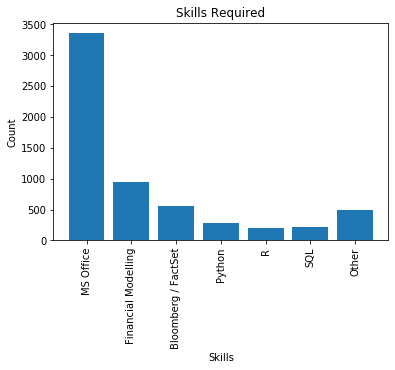

In [87]:
values = column_sums
labels = ['MS Office', 'Financial Modelling', 'Bloomberg / FactSet', 'Python', 'R', 'SQL','Other']

plt.bar(labels, values) 

plt.title('Skills Required') 

plt.xlabel('Skills') 
plt.ylabel('Count') 

plt.xticks(rotation=90)

plt.show()


In [88]:
df_bool.to_csv('df_bool.csv')

In [80]:
len(df_bool)

6620

In [77]:
df_dline_filtered = df_dline.drop(non_str_index, axis=0, inplace=False) 
len(df_dline_filtered)

6620

In [100]:
len(df_title)

6623

In [99]:
df_title_filtered = df_title.drop(non_str_index, axis=0, inplace=False) 
len(df_title_filtered)

6620

In [85]:
df_dline_filtered.head()

,deadline
0,2023-04-30
1,2023-01-06
2,2023-01-06
3,2022-12-17
4,2022-12-31


In [102]:
df_title_filtered = df_title.drop(non_str_index, axis=0, inplace=False) 
len(df_title_filtered)

6620

In [94]:
df_dline_filtered['deadline'] = df_dline_filtered['deadline'].dt.strftime("%Y-%m-%d")

df_dline_filtered['deadline'] = df_dline_filtered['deadline'].str[:4]

In [95]:
df_dline_filtered

,deadline
0,2023
1,2023
2,2023
3,2022
4,2022
...,...
6618,2012
6619,2012
6620,2012
6621,2012


In [104]:
len(df_title_filtered)

6620

In [109]:
len(df_dline_filtered)

6620

In [106]:
len(df_bool)

6620

In [116]:
df_filtered = pd.concat([df_title_filtered,df_dline_filtered,df_bool], axis = 1)

df_filtered

,title,deadline,Microsoft Office,Financial Modelling,Data Platform,Python,R,SQL,Other Programming Languages
0,Rothschild & Co - Private Equity Long-Term Int...,2023,1,0,0,0,0,0,1
1,2023 HSBC Global Graduate Programme (Hong Kong...,2023,0,0,0,0,0,0,0
2,2023 HSBC Global Internship Programme (Hong Ko...,2023,0,0,0,0,0,0,0
3,"Graduate Training Scheme, Capital Markets",2022,1,0,0,0,0,0,0
4,6-Months Internship – Sell-side Tech M&A,2022,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
6618,2012 Summer Internship - Financial Software De...,2012,0,0,0,0,0,1,1
6619,Technical Consultant - Graduate Programme 2012,2012,1,1,0,0,0,0,0
6620,Risk Implementation Consultant - Graduate Prog...,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6621,Project Consultant - Graduate Programme 2012,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
df_filtered.to_csv('df_filtered.csv')

In [98]:
df_filtered.head()

,title,deadline,Microsoft Office,Financial Modelling,Data Platform,Python,R,SQL,Other Programming Languages
0,Rothschild & Co - Private Equity Long-Term Int...,2023,1,0,0,0,0,0,1
1,2023 HSBC Global Graduate Programme (Hong Kong...,2023,0,0,0,0,0,0,0
2,2023 HSBC Global Internship Programme (Hong Ko...,2023,0,0,0,0,0,0,0
3,"Graduate Training Scheme, Capital Markets",2022,1,0,0,0,0,0,0
4,6-Months Internship – Sell-side Tech M&A,2022,1,0,0,0,0,0,0


In [38]:
#Individual Job View of NER 
# NER = Name Entity Recognition
rend_doc_1 = docs_1[73]

from spacy import displacy
displacy.render(rend_doc_1,style="ent")

END of PIPELINE

In [55]:
#Export as .csv file
#df_r_1.to_csv('df_r_1.csv')